In [11]:
!pip install faker

In [12]:
from faker import Faker
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
fake = Faker()

# Generate a list of fake user profiles
def generate_user_data(n):
    users = []
    for _ in range(n):
        user = {
            "user_id": fake.uuid4(),
            "name": fake.name(),
            "address": fake.address(),
            "email": fake.email(),
            "phone_number": fake.phone_number(),
            "date_of_birth": fake.date_of_birth(minimum_age=18, maximum_age=70),
            "signup_date": fake.date_this_decade()
        }
        users.append(user)
    return pd.DataFrame(users)

# Generate data for 100 users
user_data = generate_user_data(100)
user_data.head()


,user_id,name,address,email,phone_number,date_of_birth,signup_date
0,bad0f399-b936-417c-a238-56079f19b88d,Ashley Mcintosh,"623 Lisa Fields Suite 884\nEast Jasonmouth, NV...",elizabeth01@example.net,(889)984-8561x885,1997-08-29,2022-05-04
1,716fba64-a05b-4ebd-97f9-636cdbb44be0,Kathryn Scott,"721 Lindsey Curve Suite 968\nSouth Michael, GU...",johndixon@example.org,001-585-930-5563x05110,1958-11-11,2022-03-18
2,1deebb01-ff6f-44b7-9857-3681a2097bf0,Julia Hernandez,"178 Weaver Valley\nCoreychester, IL 31363",leeholly@example.net,211.901.6318x3264,1960-02-07,2021-11-05
3,c347dc4a-7527-4215-88f2-7160589b2c12,Andrea Flynn,"1398 Aaron Villages\nWilliamside, IN 22059",jacksondonald@example.com,+1-701-611-3084x1910,1985-07-26,2024-01-22
4,65d5f9f1-698d-400f-a5b9-d5c93d93ffba,Anthony Edwards,"8795 Wallace Island Apt. 796\nTaylortown, OH 3...",kaitlynbailey@example.org,001-624-423-4670x4718,1993-11-26,2021-12-02


In [14]:
def generate_order_data(n, users_df):
    orders = []
    for _ in range(n):
        order = {
            "order_id": fake.uuid4(),
            "user_id": fake.random_element(users_df['user_id'].to_list()),
            "product": fake.word(ext_word_list=['Laptop', 'Smartphone', 'Headphones', 'Tablet', 'Camera']),
            "price": fake.random_int(min=100, max=1500),
            "order_date": fake.date_between(start_date="-2y", end_date="today")
        }
        orders.append(order)
    return pd.DataFrame(orders)

# Generate data for 300 orders
order_data = generate_order_data(300, user_data)
order_data.head()


,order_id,user_id,product,price,order_date
0,6371a810-5cf8-4346-9b66-beea663876ce,f2f48219-0041-4853-a44b-212952889d25,Tablet,1031,2023-05-29
1,1a12eb3f-b962-4246-8dc6-705e521844bc,2c50a478-6a2a-4282-9ffc-a4720ecaeeef,Camera,898,2023-02-21
2,b0b476b7-d5b4-4e02-8655-800134abbe40,c8333ff0-da77-452f-b14c-582d00fd5ea9,Camera,533,2024-07-04
3,50d64d2e-9047-43eb-9642-28d20522954e,74e4c524-b833-45fd-85fa-e4e63359fb0d,Tablet,719,2023-11-09
4,bb19a959-70fc-4384-9649-a21fa78146b5,06654b6a-ca99-4f5d-9e1a-cc4874704e9b,Headphones,567,2022-10-13


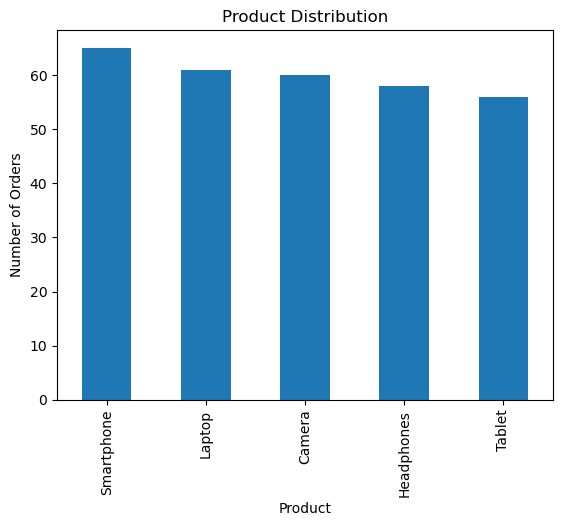

In [15]:
# Plot the distribution of orders by product type
product_distribution = order_data['product'].value_counts()
product_distribution.plot(kind='bar', title='Product Distribution')
plt.xlabel('Product')
plt.ylabel('Number of Orders')
plt.show()


product
Camera        53896
Laptop        49644
Smartphone    48987
Tablet        46974
Headphones    44820
Name: price, dtype: int64


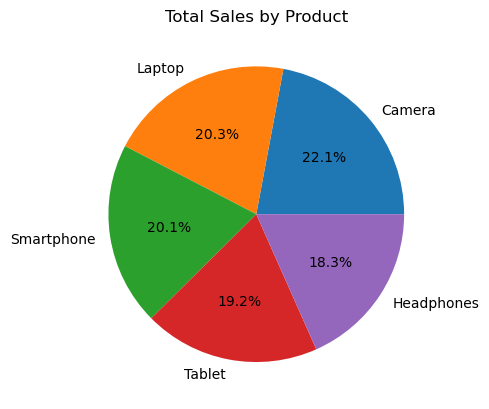

In [16]:
# Calculate total sales per product
total_sales = order_data.groupby('product')['price'].sum().sort_values(ascending=False)
print(total_sales)

# Visualize total sales
total_sales.plot(kind='pie', title='Total Sales by Product', autopct='%1.1f%%')
plt.ylabel('')
plt.show()


In [17]:
# Save the user and order data to CSV files
user_data.to_csv('fake_user_data.csv', index=False)
order_data.to_csv('fake_order_data.csv', index=False)
